# 目录
21. 读取本地的excel数据
22. 查看df数据的前五行
23. 将salary列数据转换为最大值与最小值的平均值
24. 将数据根据学历进行分组冰计算平均薪资
25. 将createTime列时间转换为月-日
26. 查看索引、数据类型和内存信息
27. 查看数据型列的汇总统计
28. 新增一列：根据salary将数据分为三组
29. 按照salary列对数据进行降序排序
30. 取出第4行数据
31. 计算salary列的中位数
32. 绘制薪资水平频率分布直方图
33. 绘制薪资水平密度曲线
34. 删除最后一列categories
35. 将df的第一列与第二列合并为新的一列
36. 将education列与salary列合并为新的一列
37. 计算salary最大值与最小值之差
38. 将第一行与最后一行拼接
39. 将第8行数据添加至末尾
40. 查看每列的数据类型
41. 将createTime列设置为索引
42. 生成一个和df长度相同的随机数dataFrame
43. 将上一题生成的dataFrame与df合并
44. 生成新的一列new为salary列减去之前生成的随机数列
45. 检查数据中是否就按有缺失值
46. 将salary列类型转化为浮点数
47. 计算salary大于10000的次数
48. 查看每种学历出现的次数
49. 查看edycation列共有几种学历
50. 提取salary与new列的和大于60000的最后3行

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 21. 读取本地的excel数据
df = pd.read_excel("demo2.xlsx")
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-17 10:58:48,本科,20k-40k
2,2020-03-18 11:46:39,不限,20k-35k
3,2020-03-19 11:45:44,本科,13k-20k
4,2020-03-20 11:20:41,本科,10k-20k
5,2020-03-21 11:36:07,硕士,25k-50k
6,2020-03-22 09:54:47,本科,20k-40k
7,2020-03-23 10:48:32,本科,15k-23k
8,2020-03-24 10:46:31,硕士,20k-40k
9,2020-03-25 11:19:38,不限,10k-18k


In [13]:
# 22. 查看df数据的前五行
df.head(5)

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-17 10:58:48,本科,20k-40k
2,2020-03-18 11:46:39,不限,20k-35k
3,2020-03-19 11:45:44,本科,13k-20k
4,2020-03-20 11:20:41,本科,10k-20k


In [16]:
# 23. 将salary列数据转换为最大值与最小值的平均值
import re
def func(df):
    lst = df['salary'].split('-')
    smin = int(lst[0].strip('k'))
    smax = int(lst[1].strip('k'))
    df['salary'] = int((smin+smax)/2*1000)
    return df

df = df.apply(func,axis=1)
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-17 10:58:48,本科,30000
2,2020-03-18 11:46:39,不限,27500
3,2020-03-19 11:45:44,本科,16500
4,2020-03-20 11:20:41,本科,15000
5,2020-03-21 11:36:07,硕士,37500
6,2020-03-22 09:54:47,本科,30000
7,2020-03-23 10:48:32,本科,19000
8,2020-03-24 10:46:31,硕士,30000
9,2020-03-25 11:19:38,不限,14000


In [17]:
# 24. 将数据根据学历进行分组冰计算平均薪资
print(df.groupby('education').mean())

            salary
education         
不限         20750.0
本科         23000.0
硕士         33750.0


In [22]:
# 25. 将createTime列时间转换为月-日
for i in range(len(df)):
    df.iloc[i,0] = df.iloc[i,0].to_pydatetime().strftime('%m-%d')
df.head()

,createTime,education,salary
0,03-16,本科,27500
1,03-17,本科,30000
2,03-18,不限,27500
3,03-19,本科,16500
4,03-20,本科,15000


In [23]:
# 26. 查看索引、数据类型和内存信息

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   createTime  10 non-null     object
 1   education   10 non-null     object
 2   salary      10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [24]:
# 27. 查看数据型列的汇总统计
df.describe()

,salary
count,10.000000
mean,24700.000000
std,7972.870667
min,14000.000000
25%,17125.000000
50%,27500.000000
75%,30000.000000
max,37500.000000


In [25]:
# 28. 新增一列：根据salary将数据分为三组
bins = [0,5000,20000,50000]
group_names = ['低','中','高']
df['categories'] = pd.cut(df['salary'],bins,labels = group_names)
df

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-17,本科,30000,高
2,03-18,不限,27500,高
3,03-19,本科,16500,中
4,03-20,本科,15000,中
5,03-21,硕士,37500,高
6,03-22,本科,30000,高
7,03-23,本科,19000,中
8,03-24,硕士,30000,高
9,03-25,不限,14000,中


In [27]:
# 29. 按照salary列对数据进行降序排序
df = df.sort_values('salary',ascending=False)
df

,createTime,education,salary,categories
5,03-21,硕士,37500,高
1,03-17,本科,30000,高
6,03-22,本科,30000,高
8,03-24,硕士,30000,高
0,03-16,本科,27500,高
2,03-18,不限,27500,高
7,03-23,本科,19000,中
3,03-19,本科,16500,中
4,03-20,本科,15000,中
9,03-25,不限,14000,中


In [31]:
# 30. 取出第4行数据
df.loc[3]

createTime    03-19
education        本科
salary        16500
categories        中
Name: 3, dtype: object

In [32]:
# 31. 计算salary列的中位数
np.mean(df['salary'])

24700.0

<AxesSubplot:ylabel='Frequency'>

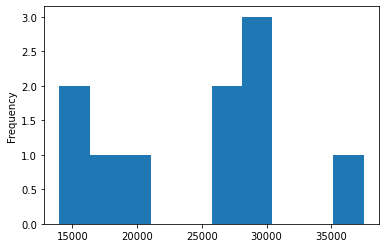

In [33]:
# 32. 绘制薪资水平频率分布直方图
df.salary.plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

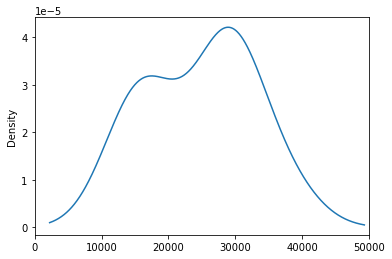

In [37]:
# 33. 绘制薪资水平密度曲线
df.salary.plot(kind = 'kde',xlim = (0,50000))

In [38]:
# 34. 删除最后一列categories
del df['categories']
df

,createTime,education,salary
5,03-21,硕士,37500
1,03-17,本科,30000
6,03-22,本科,30000
8,03-24,硕士,30000
0,03-16,本科,27500
2,03-18,不限,27500
7,03-23,本科,19000
3,03-19,本科,16500
4,03-20,本科,15000
9,03-25,不限,14000


In [46]:
# 35. 将df的第一列与第二列合并为新的一列
df['test'] = df['education'] + ['createtime']
print(df)
del df['test']

  createTime education  salary          test
5      03-21        硕士   37500  硕士createtime
1      03-17        本科   30000  本科createtime
6      03-22        本科   30000  本科createtime
8      03-24        硕士   30000  硕士createtime
0      03-16        本科   27500  本科createtime
2      03-18        不限   27500  不限createtime
7      03-23        本科   19000  本科createtime
3      03-19        本科   16500  本科createtime
4      03-20        本科   15000  本科createtime
9      03-25        不限   14000  不限createtime


In [47]:
# 36. 将education列与salary列合并为新的一列
df['test2'] = df['education'] + df['salary'].map(str)
print(df)
del df['test2']

  createTime education  salary    test2
5      03-21        硕士   37500  硕士37500
1      03-17        本科   30000  本科30000
6      03-22        本科   30000  本科30000
8      03-24        硕士   30000  硕士30000
0      03-16        本科   27500  本科27500
2      03-18        不限   27500  不限27500
7      03-23        本科   19000  本科19000
3      03-19        本科   16500  本科16500
4      03-20        本科   15000  本科15000
9      03-25        不限   14000  不限14000


In [49]:
# 37. 计算salary最大值与最小值之差
df[['salary']].apply(lambda x:x.max()-x.min())

salary    23500
dtype: int64

In [51]:
# 38. 将第一行与最后一行拼接
pd.concat([df[:1],df[-2:-1]])

,createTime,education,salary
5,03-21,硕士,37500
4,03-20,本科,15000


In [52]:
# 39. 将第8行数据添加至末尾
df.append(df.iloc[7])

C:\Users\Monty _L\AppData\Local\Temp\ipykernel_6204\1036772663.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(df.iloc[7])


,createTime,education,salary
5,03-21,硕士,37500
1,03-17,本科,30000
6,03-22,本科,30000
8,03-24,硕士,30000
0,03-16,本科,27500
2,03-18,不限,27500
7,03-23,本科,19000
3,03-19,本科,16500
4,03-20,本科,15000
9,03-25,不限,14000


In [53]:
# 40. 查看每列的数据类型
df.dtypes

createTime    object
education     object
salary         int64
dtype: object

In [54]:
# 41. 将createTime列设置为索引
df.set_index("createTime")

,education,salary
createTime,,
03-21,硕士,37500
03-17,本科,30000
03-22,本科,30000
03-24,硕士,30000
03-16,本科,27500
03-18,不限,27500
03-23,本科,19000
03-19,本科,16500
03-20,本科,15000


In [62]:
# 42. 生成一个和df长度相同的随机数dataFrame
df1 = pd.DataFrame(pd.Series(np.random.randint(1,10,len(df['salary']))))
df1

,0
0,5
1,3
2,8
3,9
4,5
5,1
6,1
7,7
8,6
9,1


In [63]:
# 43. 将上一题生成的dataFrame与df合并
df = pd.concat([df,df1],axis=1)
df

,createTime,education,salary,0
5,03-21,硕士,37500,1
1,03-17,本科,30000,3
6,03-22,本科,30000,1
8,03-24,硕士,30000,6
0,03-16,本科,27500,5
2,03-18,不限,27500,8
7,03-23,本科,19000,7
3,03-19,本科,16500,9
4,03-20,本科,15000,5
9,03-25,不限,14000,1


In [67]:
# 44. 生成新的一列new为salary列减去之前生成的随机数列
df['new'] = df['salary']-df[0]
df

,createTime,education,salary,0,new
5,03-21,硕士,37500,1,37499
1,03-17,本科,30000,3,29997
6,03-22,本科,30000,1,29999
8,03-24,硕士,30000,6,29994
0,03-16,本科,27500,5,27495
2,03-18,不限,27500,8,27492
7,03-23,本科,19000,7,18993
3,03-19,本科,16500,9,16491
4,03-20,本科,15000,5,14995
9,03-25,不限,14000,1,13999


In [68]:
# 45. 检查数据中是否就按有缺失值
df.isnull().values.any()

False

In [69]:
# 46. 将salary列类型转化为浮点数
df['salary'].astype(np.float64)

5    37500.0
1    30000.0
6    30000.0
8    30000.0
0    27500.0
2    27500.0
7    19000.0
3    16500.0
4    15000.0
9    14000.0
Name: salary, dtype: float64

In [70]:
# 47. 计算salary大于10000的次数
len(df[df['salary']>10000])

10

In [71]:
# 48. 查看每种学历出现的次数
df.education.value_counts()

本科    6
硕士    2
不限    2
Name: education, dtype: int64

In [73]:
# 49. 查看edycation列共有几种学历
df['education'].nunique()

3

In [74]:
# 50. 提取salary与new列的和大于60000的最后3行
df1 = df[['salary','new']]
rowsums = df1.apply(np.sum,axis = 1)
res = df.iloc[np.where(rowsums > 60000)[0][-3:],:]
res

,createTime,education,salary,0,new
5,03-21,硕士,37500,1,37499
